In [2]:
# Brían Ó Fearraigh, Rodrigo G. Ruiz

import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual, Output
import ipywidgets as widgets
import IPython
from IPython.display import clear_output, display
from array import array
from ctypes import string_at


import matplotlib.mlab as mlab
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

# Lateral Spread of Muon Bundles
From APP 25 (2006) 1-13, the muon radial distance $R$ from the shower axis is taken into account in order to correctly parameterize the energy of the muons in a bundle.

The muon lateral distrubution in a plane perpendicular to the shower axis can be described as

$ \cfrac{dN}{dR} = C \cfrac{R}{(R + R_{0})^{\alpha}} $.

The average value of the of the radial distribtution is given by: 

$\langle R \rangle = 2 R_{0} / (\alpha - 3 ) $.

$C$ represents a normalization given by

$C = (\alpha - 1 )(\alpha - 2 ) \cdot R_{0}^{\alpha-2} $.

## The parameter $\langle R \rangle$

In MUPAGE, for a given depth $h$, multiplicity $M$ and zenith angle $\theta$, the average radial distance $\langle R \rangle$ is parameterised as

$\langle R \rangle = \rho(h, \theta, M) = \rho_{0}(M) \cdot h^{\rho_{1}} \cdot F(\theta)$

where 

$\rho_{0}(M) = \rho_{0a} \cdot M + \rho_{0b} $

and

$F(\theta) = \cfrac{1}{e^{\theta - \theta_{0} \cdot f} +1 } $.

## The parameter $\alpha$

This parameter is given as

$\alpha = \alpha(h,M) =  \alpha_{0}(M) \cdot e^{\alpha_{1}(M) \cdot h} $,

where

$\alpha_{0}(M) = \alpha_{0a} \cdot M + \alpha_{0b} $

and

$\alpha_{1}(M) = \alpha_{1a} \cdot M + \alpha_{1b} $.

The lateral spread is plotted below using different values of the above parameters. 

In [3]:
#define functions and parameters #########################

theta = np.arange(0, np.pi/2, 0.001)
h = 2.785
multiplicity=2

rho_0_a = -1.786
rho_0_b = 28.26
rho_1 = -1.06
theta_0 = 1.3
f = 10.4

alpha_0_a = -0.448
alpha_0_b = 4.969
alpha_1_a = 0.0194
alpha_1_b = 0.276

def alpha_0(M, alpha_0_a, alpha_0_b):
    alpha_0 = alpha_0_a * M + alpha_0_b
    return alpha_0

def alpha_1(M, alpha_1_a, alpha_1_b):
    alpha_1 = alpha_1_a * M + alpha_1_b
    return alpha_1

def alpha(h , M, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b):
    alpha = float(alpha_0(M, alpha_0_a, alpha_0_b) * np.exp(alpha_1(M, alpha_1_a, alpha_1_b) * h))
    return alpha

def F(theta, f, theta_0):
    F = np.exp(f * (theta - theta_0)) + 1
    return 1./F

def rho_0(M, rho_0_a, rho_0_b):
    rho_0 = rho_0_a * M + rho_0_b
    return rho_0

def R(M, theta, h, rho_0_a, rho_0_b, rho_1, f, theta_0):
    R = rho_0(M, rho_0_a, rho_0_b) * F(theta, f, theta_0) * np.power(h , rho_1)
    return R

def R_0(M , theta , h, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0):
    R_0 = 0.5 * R(M, theta, h, rho_0_a, rho_0_b, rho_1, f, theta_0) * (alpha(h , M, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b) - 3)
    return R_0

def C(M , theta , h, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b):
    C = (alpha(h , M, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b) - 1) * (alpha(h , M, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b) - 2) * np.power(R_0(M, theta, h, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0) , (alpha(h , M, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b) - 2))  
    return C

def dN_dR(M , theta , h, R, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ):
    dN_dR = C(M , theta , h, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b) * R /np.power((R + R_0(M , theta , h, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0)) , alpha(h , M, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b)) 
    return dN_dR




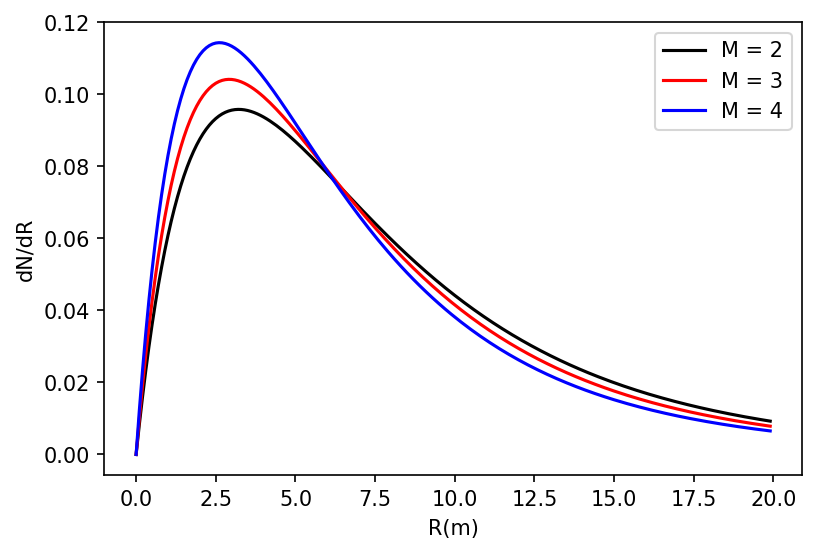

In [5]:
#plot lateral spread for different multiplicities #########################

def plot_lateral_spread_M():
    Rmin = 0.0
    Rmax = 20
    npointsR = 200
    deltaR = (Rmax-Rmin)/npointsR
    Rs = []
    Spreads = []
    theta = 0.0
    ms = [2.0 , 3.0 , 4.0]
    for i in range(len(ms)):
        spread = []
        rs = []
        for j in range(npointsR):
            r = Rmin + deltaR * j
            rs.append(r)
            spread.append(dN_dR(ms[i] , theta , h , r, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ))
        Spreads.append(spread)
        Rs.append(rs)   
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(Rs[0], Spreads[0],'black', label=r'M = 2')
    ax.plot(Rs[1], Spreads[1],'red', label=r'M = 3')
    ax.plot(Rs[2], Spreads[2],'blue', label=r'M = 4')
    plt.xlabel(r'R(m)', fontsize = 10)
    plt.ylabel(r'dN/dR', fontsize = 10)
    plt.rcParams['figure.dpi'] = 150
    plt.legend()
    plt.show()
    
plot_lateral_spread_M()


Interactive look at the lateral distribution when one varies the depth $h$, zenith angle and multiplicity.

In [ ]:
lateral_distance = np.arange(0,20, 0.01)
zenith_angle = 0 #radians

opts = dict(continuous_update=False, readout=True,readout_format='.3f')

def plot_basic_parameters( multiplicity=widgets.FloatSlider(min=2, max= 4, value=multiplicity,**opts),
       h=widgets.FloatSlider(min=2.0,max=4.0,value=h,**opts),
       zenith_angle=widgets.FloatSlider(min=0,max=np.pi/2,value=zenith_angle,**opts)):
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b,rho_0_a, rho_0_b, rho_1, f, theta_0 ))
    ax.set_xlabel(r'R(m)', fontsize = 10)
    ax.set_ylabel(r'dN/dR', fontsize = 10)
    ax.set_ylim(0.0,0.12)

interactive_plot = interactive(plot_basic_parameters)
output = interactive_plot.children[-1]
output.layout = {'height': '600px'}
interactive_plot


## $\alpha$ parameters

Change these parameters interactively & statically.

In [ ]:
#array = np.arange(0,20, 0.01)
#mult=2
#angle = 0

#def plot( alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b):
#    plt.figure(3)
#    plt.plot(array, dN_dR(mult, angle, h, array, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b))
#    plt.xlabel(r'R(m)', fontsize = 10)
#    plt.ylabel(r'dN/dR', fontsize = 10)
 #   plt.ylim(0,0.15)
#    plt.show()

#interactive_plot = interactive(plot, alpha_0_a=(alpha_0_a-0.01,alpha_0_a+0.01), alpha_0_b=alpha_0_b, alpha_1_a=alpha_1_a, alpha_1_b=alpha_1_b)

#interactive_plot

lateral_distance = np.arange(0,20, 0.01)
zenith_angle = 0 #radians

opts = dict(continuous_update=False, readout=True,readout_format='.4f')

def plot_alpha_parameters( alpha_0a=widgets.FloatSlider(min=alpha_0_a - 0.05, max= alpha_0_a + 0.05, value=alpha_0_a,step=0.001,**opts),
                          alpha_0b=widgets.FloatSlider(min=alpha_0_b - 0.05,max=alpha_0_b + 0.05, value=alpha_0_b,step=0.01,**opts),
                          alpha_1a=widgets.FloatLogSlider(min=-1.8,max=-1.5, value=alpha_1_a,step=0.0001,**opts),
                          alpha_1b=widgets.FloatSlider(min=alpha_1_b - 0.005,max=alpha_1_b + 0.005, value=alpha_1_b,step=0.001,**opts)):
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(lateral_distance, dN_dR(2, 0, h, lateral_distance, alpha_0a, alpha_0b, alpha_1a, alpha_1b, rho_0_a, rho_0_b, rho_1, f, theta_0 ))
    ax.set_xlabel(r'R(m)', fontsize = 10)
    ax.set_ylabel(r'dN/dR', fontsize = 10)
    ax.set_ylim(0,0.12)

interactive_plot = interactive(plot_alpha_parameters)
output = interactive_plot.children[-1]
output.layout = {'height': '600px'}
interactive_plot

In [ ]:
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_0_a: '+ str(alpha_0_a) + ' (nominal)')
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a + 0.5, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_0_a: '+ str(alpha_0_a+ 0.5)  )
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a - 0.5, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_0_a: '+ str(alpha_0_a- 0.5) )
plt.xlabel(r'R(m)', fontsize = 10)
plt.ylabel(r'dN/dR', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_0_b: '+ str(alpha_0_b) + ' (nominal)')
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b + 0.5, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_0_b: '+ str(alpha_0_b+ 0.5)  )
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b - 0.5, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_0_b: '+ str(alpha_0_b- 0.5) )
plt.xlabel(r'R(m)', fontsize = 10)
plt.ylabel(r'dN/dR', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_1_a: '+ str(alpha_1_a) + ' (nominal)')
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a + 0.05, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_1_a: '+ str(alpha_1_a + 0.05)  )
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a - 0.05, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 ), label = 'alpha_1_a: '+ str(alpha_1_a - 0.05) )
plt.xlabel(r'R(m)', fontsize = 10)
plt.ylabel(r'dN/dR', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0), label = 'rho_0_a: '+ str(rho_0_a) + ' (nominal)')
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a + 1.0, rho_0_b, rho_1, f, theta_0), label = 'rho_0_a: '+ str(rho_0_a + 1.0)  )
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a - 1.0, rho_0_b, rho_1, f, theta_0), label = 'rho_0_a: '+ str(rho_0_a - 1.0) )
plt.xlabel(r'R(m)', fontsize = 10)
plt.ylabel(r'dN/dR', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0), label = 'rho_0_b: '+ str(rho_0_b) + ' (nominal)')
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b + 5, rho_1, f, theta_0), label = 'rho_0_b: '+ str(rho_0_b + 5.0)  )
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b - 5, rho_1, f, theta_0), label = 'rho_0_b: '+ str(rho_0_b - 5.0) )
plt.xlabel(r'R(m)', fontsize = 10)
plt.ylabel(r'dN/dR', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0), label = 'rho_1: '+ str(rho_1) + ' (nominal)')
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1 + 0.2, f, theta_0), label = 'rho_1: '+ str(rho_1 + 0.2)  )
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1 - 0.2, f, theta_0), label = 'rho_1: '+ str(rho_1 - 0.2) )
plt.xlabel(r'R(m)', fontsize = 10)
plt.ylabel(r'dN/dR', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0), label = 'f: '+ str(f) + ' (nominal)')
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f + 5.0, theta_0), label = 'f: '+ str(f + 5.0)  )
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f - 5.0, theta_0), label = 'f: '+ str(f - 5.0) )
plt.xlabel(r'R(m)', fontsize = 10)
plt.ylabel(r'dN/dR', fontsize = 10)
plt.legend()
plt.show()

In [ ]:
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0), label = 'theta_0: '+ str(theta_0) + ' (nominal)')
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 + 0.7), label = 'theta_0: '+ str(theta_0 + 0.7)  )
plt.plot(lateral_distance, dN_dR(multiplicity, zenith_angle, h, lateral_distance, alpha_0_a, alpha_0_b, alpha_1_a, alpha_1_b, rho_0_a, rho_0_b, rho_1, f, theta_0 - 0.7), label = 'theta_0: '+ str(theta_0 - 0.7) )
plt.xlabel(r'R(m)', fontsize = 10)
plt.ylabel(r'dN/dR', fontsize = 10)
plt.legend()
plt.show()